<a href="https://colab.research.google.com/github/flurpo/IBMspx/blob/main/Module4_Spacex_Machine_learning_Prediction_flowchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.1 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.1 MB 11.1 MB/s eta 0:00:01
   ---------- ----------------------------- 3.0/11.1 MB 17.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 21.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.5/11.1 MB 24.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.5/11.1 MB 27.1 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 36.4 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 34.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [7]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [8]:
import pandas as pd
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = requests.get(URL1)
data = pd.read_csv(io.BytesIO(resp1.content))
print (data.head())
print (data.shape)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [9]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(resp2.content))
print(X.shape)

(90, 83)


In [10]:
#TASK 1
Y = data['Class'].to_numpy()
print (Y.shape)


(90,)


In [11]:
#TASK2
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


In [12]:
#TASK3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [13]:
#TASK4  LOGISTIC REGRESSION
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
logreg=LogisticRegression()

logreg_cv = GridSearchCV(logreg, parameters, cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [14]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Test Accuracy: 0.8333333333333334


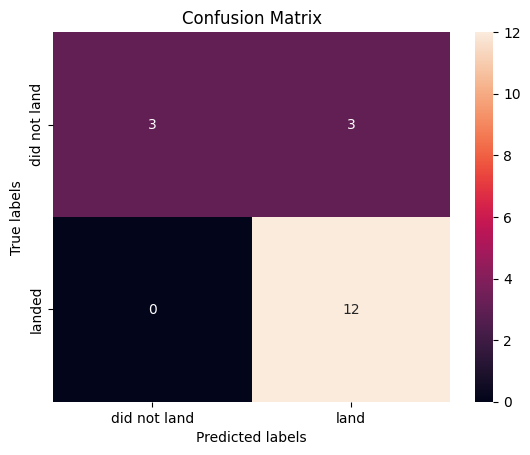

In [15]:
#TASK5
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [16]:
#TASK6 Support Vector Machine
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Test Accuracy: 0.8333333333333334


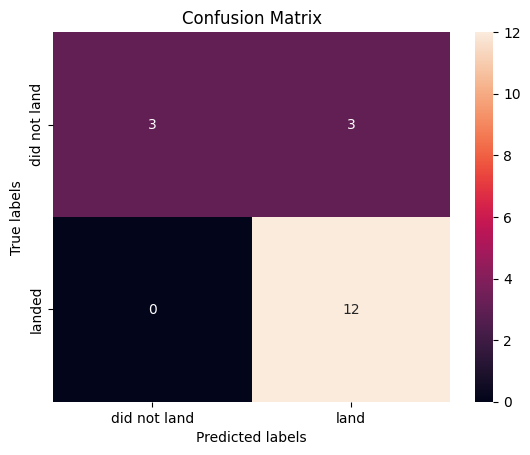

In [18]:
#TASK7
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [19]:
#TASK8 Decision Tree Classifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     #'max_features': ['auto', 'sqrt'],
     'max_features': ['sqrt', 'log2'], #removed 'auto' from 'max_features' in parameters - not a valid option in DecisionTreeClassifier
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143


Test Accuracy: 0.8333333333333334


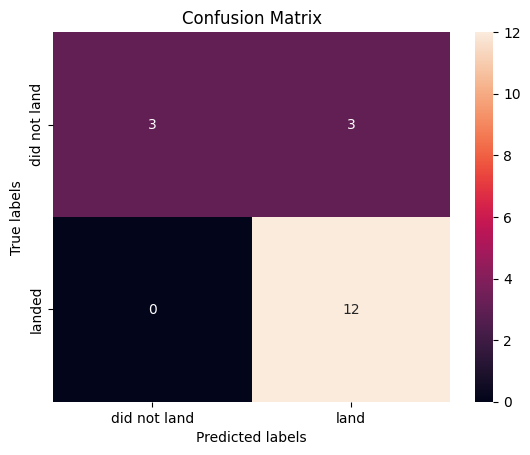

In [21]:
#TASK9
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [22]:
#TASK10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [23]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Test Accuracy: 0.8333333333333334


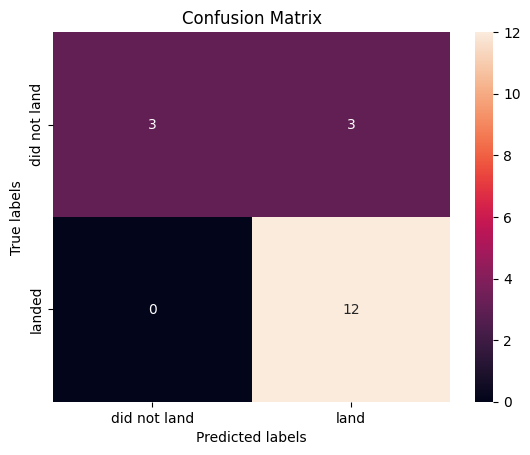

In [24]:
#TASK11
knntest_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", knntest_accuracy)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [26]:
#TASK12
print('RESULTS:\n')
print ('Calculated Accuracy Results for Logistic Regression')
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("Logistic Regression Test Accuracy:", logreg_accuracy)
print('\n')

print ('Calculated Accuracy Results for Support Vector Machine')
svm_accuracy = svm_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
print("Support Vector Machine Test Accuracy:", svm_accuracy)
print('\n')

print ('Calculated Accuracy Results for Decision Tree')
tree_accuracy = tree_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
print("Decision Tree Test Accuracy:", tree_accuracy)
print("removed 'auto' from 'max_features' in parameters - not a valid option in DecisionTreeClassifier")
print('\n')

print ('Calculated Accuracy Results for K-Nearest Neighbors')# Accuracy for K-Nearest Neighbors
knn_accuracy = knn_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print("K-Nearest Neighbors Test Accuracy:", knn_accuracy)
print('\n')

print('IN SUMMARY:')
print('The test data accuracy and confusion matrix response was identical accross the model results. So its very difficult to chose a best model based on the test accuracy.')
print('SVM is likely to perform the best overall on this dataset due to its strength in handling high-dimensional data and non-linear relationships. However, Logistic Regression could also be a strong contender if the relationships between the features and the target are mostly linear. KNN should be the worst performer as it is less effective with High-dimensional data. \n')

print('CONCLUSION:')
print('The Cross-validataion results (GridSearchCV) should be considered as this is the best performer on the dataset. Based on that weight I would choose the DECISION TREE CLASSIFIER as the best perfromer as it has the highest GridSearchCV result!')
print('accuracy : 0.8875')

# Find the best performing model
#best_accuracy = max(logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy)
#if best_accuracy == logreg_accuracy:
#    print("Best Model: Logistic Regression")
#elif best_accuracy == svm_accuracy:
#    print("Best Model: Support Vector Machine")
#elif best_accuracy == tree_accuracy:
#    print("Best Model: Decision Tree")
#else:
#    print("Best Model: K-Nearest Neighbors")

#print("Best Accuracy:", best_accuracy)


RESULTS:

Calculated Accuracy Results for Logistic Regression
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713
Logistic Regression Test Accuracy: 0.8333333333333334


Calculated Accuracy Results for Support Vector Machine
tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856
Support Vector Machine Test Accuracy: 0.8333333333333334


Calculated Accuracy Results for Decision Tree
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143
Decision Tree Test Accuracy: 0.8333333333333334
removed 'auto' from 'max_features' in parameters - not a valid option in DecisionTreeClassifier


Calculated Accuracy Results for K-Nearest Neighbors
tuned hpyerparameters :(best parameter

In [ ]:
"""
Flowchart Representation
css
Copy code
[Start]
    |
    v
[Load Data]
    |
    v
[Inspect Data Shapes]
    |
    v
[Preprocess Data]
    |---> [Standardize Features]
    |---> [Extract Target Variable]
    |
    v
[Split Data into Train/Test]
    |
    v
[Choose Classifier]
    |------------------------------|
    |              |              |
    v              v              v
[Logistic Regression] [SVM] [Decision Tree] [KNN]
    |              |              |              |
    v              v              v              v
[GridSearchCV for Hyperparameter Tuning]
    |
    v
[Train Classifier]
    |
    v
[Evaluate Classifier]
    |---> [Calculate Accuracy]
    |---> [Plot Confusion Matrix]
    |
    v
[Store Results]
    |
    v
[Compare Models]
    |
    v
[Visualize Results]
    |
    v
[End]
Description of Shapes
[Start]: Oval shape to indicate the beginning of the process.
[Load Data]: Rectangle representing a process step.
[Inspect Data Shapes]: Rectangle for inspection.
[Preprocess Data]: Rectangle that branches into standardization and target extraction.
[Split Data into Train/Test]: Rectangle indicating data splitting.
[Choose Classifier]: Decision shape leading to various classifiers (Logistic Regression, SVM, Decision Tree, KNN).
[GridSearchCV for Hyperparameter Tuning]: Rectangle indicating hyperparameter tuning.
[Train Classifier]: Rectangle for training the chosen classifier.
[Evaluate Classifier]: Rectangle with branches for accuracy calculation and confusion matrix plotting.
[Store Results]: Rectangle indicating storage of results.
[Compare Models]: Rectangle for comparing the results of different models.
[Visualize Results]: Rectangle for final visualization.
[End]: Oval shape indicating the end of the process.
"""
